In [3]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [7]:
%matplotlib inline

In [20]:
def get_sobel_xy(img, sobel_kernel):
    sobx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=sobel_kernel) 
    soby = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=sobel_kernel) 
    return sobx, soby

In [34]:
def threshold_bitmask(img, scale8bit=True, thresh=(0,255)):
    scaled = img
    if scale8bit:
        scaled = np.uint8(255*img/np.max(img))
    bMask=np.zeros_like(scaled)
    bMask[(scaled>thresh[0])&(scaled<thresh[1])] = 1
    return bMask

In [35]:
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0,255)):
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    sob = cv2.Sobel(gray,cv2.CV_64F,int(orient=='x'),int(orient=='y'),ksize=sobel_kernel)
    sob = np.absolute(sob)
    return threshold_bitmask(sob,thresh=thresh)

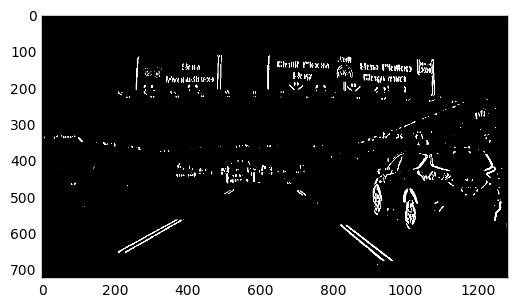

In [36]:
image = mpimg.imread('signs_vehicles_xygrad.png')
absSobX = abs_sobel_thresh(image, orient='x', sobel_kernel=15, thresh=(40,200))
plt.imshow(absSobX,cmap='gray')

In [37]:
def mag_thresh(img, sobel_kernel=3, thresh = (0,255)):
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    sx, sy = get_sobel_xy(gray, sobel_kernel)
    mag = np.sqrt(sx**2+sy**2)
    return threshold_bitmask(mag,thresh=thresh)
    

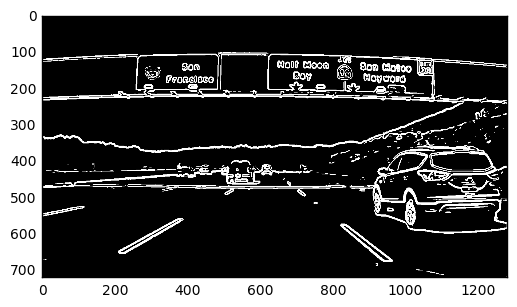

In [38]:
magThresh = mag_thresh(image, sobel_kernel=15, thresh=(40,200))
plt.imshow(magThresh,cmap='gray')

In [41]:
def dir_thresh(img, sobel_kernel=3, thresh=(0,255)):
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    sx,sy =  get_sobel_xy(gray,sobel_kernel)
    dirs = np.arctan2(np.absolute(sy),np.absolute(sx))
    return threshold_bitmask(dirs,scale8bit=False,thresh=thresh)
    

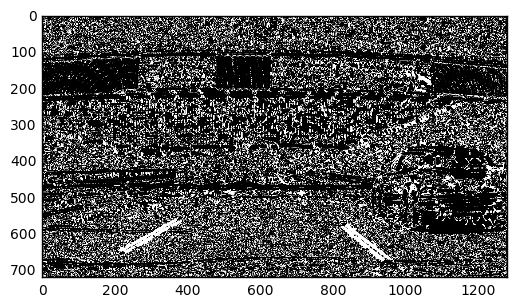

In [46]:
dirThresh= dir_thresh(image, sobel_kernel=15, thresh=(.7,1.2))
plt.imshow(dirThresh,cmap='gray')

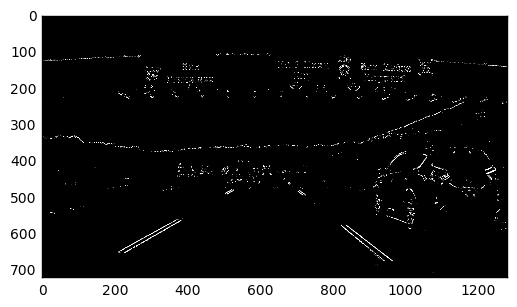

In [58]:
ksize = 3
gradx = abs_sobel_thresh(image,orient='x',sobel_kernel=ksize,thresh=(50,255))
grady = abs_sobel_thresh(image,orient='y',sobel_kernel=ksize,thresh=(50,255))
mag_bin = mag_thresh(image,sobel_kernel=ksize,thresh=(50,255))
dir_bin = dir_thresh(image,sobel_kernel=ksize,thresh=(.6,1.3))

combined = np.zeros_like(dir_bin)
combined[((gradx==1) & (grady==1)) | ((mag_bin==1)&(dir_bin==1)) ] = 1
plt.imshow(combined,cmap='gray')